# Lab 1


## Excutive Summmary

Based on simulation optimization, I recomment capacity rationing policy. Here are the optimization results:
* Constant pricing policy: optimal $p = 250$, expected profit $= 2782.50$
* Dynamic pricing policy: optimal $p1 = 235$, optimal $p2 = 315$, expected profit $= 3462.65$
* Capacity rationing policy: optimal $p1 = 230$, optimal $p2 = 315$, optimal $l = 37$, expected profit $= 4002.12$

Based on simualtion, adopting capacity rationing policy would increase the profit by $43.85\%$ compared to the current constant price policy.

## Generating Customers

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import binom

In [8]:
def generateCustomers():
    customers = []
    sizeL = norm(200, 60).rvs()
    sizeL = max(0,int(round(sizeL)))
    for i in range(sizeL):
        customers.append([uniform(0,180).rvs(), norm(200, 80).rvs()])
    sizeB = norm(60,20).rvs()
    sizeB = max(0,int(round(sizeB)))
    for i in range(sizeB):
        customers.append([uniform(0,14).rvs(), norm(350, 120).rvs()])
    customers = pd.DataFrame(customers,columns=['arrival_time','valuation'])\
        .sort_values('arrival_time', ascending=False).reset_index(drop=True)
    return customers

## Simulating Pricing Policies

In [1]:
def simulateConstant(customers,seats,p):
    n = min(seats,(customers['valuation']>=p).sum())
    return n*p

In [2]:
def simulateDynamic(customers,seats,p1,p2):
    revenue = 0
    counter = 0
    for i in customers.index:
        if counter >= seats:
            return revenue
        elif customers.loc[i, 'arrival_time'] >= 14:
            if customers.loc[i, 'valuation']>=p1:
                revenue += p1
                counter += 1
        else:
            if customers.loc[i, 'valuation']>=p2:
                revenue += p2
                counter += 1
    return revenue

In [3]:
def simulateRationing(customers,seats,p1,p2,l):
    revenue = 0
    counter = 0
    for i in customers.index:
        if counter >= seats:
            return revenue
        elif seats-counter > l:
            if customers.loc[i, 'valuation']>=p1:
                revenue += p1
                counter += 1
        else:
            if customers.loc[i, 'valuation']>=p2:
                revenue += p2
                counter += 1
    return revenue

## Optimazing Parameters

#### Generate 100 scenarios

In [9]:
scenarios = []
for i in range(100):
    scenarios.append(generateCustomers())

#### Optimize constant pricing policy

In [10]:
%%time
bestRvenue = 0
bestPrice = 0
for p in range(0,800,5):
    totalRevnue = 0
    for customers in scenarios:
        totalRevnue += simulateConstant(customers,100,p)
    totalRevnue = round(totalRevnue/len(scenarios),2)
    if totalRevnue > bestRvenue:
        bestPrice = p
        bestRvenue = totalRevnue
print('Constant price policy: best p = %d , best expected profit = %.2f'%(bestPrice, bestRvenue-20000))
print('------')

Constant price policy: best p = 250 , best expected profit = 2782.50
------
CPU times: user 4.37 s, sys: 27.5 ms, total: 4.39 s
Wall time: 4.43 s


#### Optimize dynamic pricing policy

In [11]:
%%time
prices = []
for i in range(0,800,5):
    for j in range(i,800,5):
        prices.append([i,j])
bestRvenue = 0
bestP1, bestP2 = 0, 0    
for p1, p2 in prices:
    totalRevnue = 0
    for customers in scenarios:
        totalRevnue += simulateDynamic(customers,100,p1,p2)
    totalRevnue = round(totalRevnue/len(scenarios),2)
    if totalRevnue > bestRvenue:
        bestP1, bestP2 = p1, p2
        bestRvenue = totalRevnue
print('Dynamic price policy: best p1 = %d , best p2 = %d , best expected profit = %.2f'\
      %(bestP1, bestP2, bestRvenue-20000))
print('------')

Dynamic price policy: best p1 = 235 , best p2 = 315 , best expected profit = 3462.65
------
CPU times: user 3h 9min 26s, sys: 38.7 s, total: 3h 10min 5s
Wall time: 6h 45min 15s


#### Optimize capacity rationing policy
Since this part would take too long if iterite through all possible p1, p2 and l, we use big steps in the loop first and try to narrow down the range of candidates for each parameters. This part consist 4 rounds, and the last one is my final result.

In [16]:
%%time
prices = []
for i in range(200,600,50):
    for j in range(i,600,50):
        prices.append([i,j])
bestRvenue = 0
bestP1, bestP2, bestl = 0, 0, 0
for p1, p2 in prices:
    totalRevnue = 0
    for l in range(0,100,10):
        for customers in scenarios:
            totalRevnue += simulateRationing(customers,100,p1,p2,l)
        totalRevnue = round(totalRevnue/len(scenarios),2)
        if totalRevnue > bestRvenue:
            bestP1, bestP2, bestl = p1, p2, l
            bestRvenue = totalRevnue
print('First round: best p1 = %d , best p2 = %d , best l = %d , best profit = %.2f'\
      %(bestP1, bestP2, bestl, bestRvenue-20000))
print('------')

First round: best p1 = 250 , best p2 = 350 , best l = 20 , best profit = 3551.54
------
CPU times: user 1min 30s, sys: 470 ms, total: 1min 31s
Wall time: 1min 32s


In [18]:
%%time
prices = []
for i in range(200,400,20):
    for j in range(i,400,20):
        prices.append([i,j])
bestRvenue = 0
bestP1, bestP2, bestl = 0, 0, 0
for p1, p2 in prices:
    totalRevnue = 0
    for l in range(0,100,10):
        for customers in scenarios:
            totalRevnue += simulateRationing(customers,100,p1,p2,l)
        totalRevnue = round(totalRevnue/len(scenarios),2)
        if totalRevnue > bestRvenue:
            bestP1, bestP2, bestl = p1, p2, l
            bestRvenue = totalRevnue
print('Second round: best p1 = %d , best p2 = %d , best l = %d , best profit = %.2f'\
      %(bestP1, bestP2, bestl, bestRvenue-20000))
print('------')

Second round: best p1 = 220 , best p2 = 340 , best l = 30 , best profit = 3883.59
------
CPU times: user 2min 17s, sys: 770 ms, total: 2min 18s
Wall time: 2min 19s


In [20]:
%%time
prices = []
for i in range(200,300,10):
    for j in range(300,400,10):
        prices.append([i,j])
bestRvenue = 0
bestP1, bestP2, bestl = 0, 0, 0
for p1, p2 in prices:
    totalRevnue = 0
    for l in range(0,80,5):
        for customers in scenarios:
            totalRevnue += simulateRationing(customers,100,p1,p2,l)
        totalRevnue = round(totalRevnue/len(scenarios),2)
        if totalRevnue > bestRvenue:
            bestP1, bestP2, bestl = p1, p2, l
            bestRvenue = totalRevnue
print('Third round: best p1 = %d , best p2 = %d , best l = %d , best profit = %.2f'\
      %(bestP1, bestP2, bestl, bestRvenue-20000))
print('------')

Third round: best p1 = 230 , best p2 = 320 , best l = 35 , best profit = 3986.27
------
CPU times: user 6min 46s, sys: 2.15 s, total: 6min 48s
Wall time: 6min 57s


In [21]:
%%time
prices = []
for i in range(200,250,5):
    for j in range(300,350,5):
        prices.append([i,j])
bestRvenue = 0
bestP1, bestP2, bestl = 0, 0, 0
for p1, p2 in prices:
    totalRevnue = 0
    for l in range(10,50,1):
        for customers in scenarios:
            totalRevnue += simulateRationing(customers,100,p1,p2,l)
        totalRevnue = round(totalRevnue/len(scenarios),2)
        if totalRevnue > bestRvenue:
            bestP1, bestP2, bestl = p1, p2, l
            bestRvenue = totalRevnue
print('Capacity rationing policy: best p1 = %d , best p2 = %d , best l = %d , best profit = %.2f'\
      %(bestP1, bestP2, bestl, bestRvenue-20000))
print('------')

Capacity rationing policy: best p1 = 230 , best p2 = 315 , best l = 37 , best profit = 4002.12
------
CPU times: user 16min 10s, sys: 4.23 s, total: 16min 15s
Wall time: 1h 14min 53s


## Testing

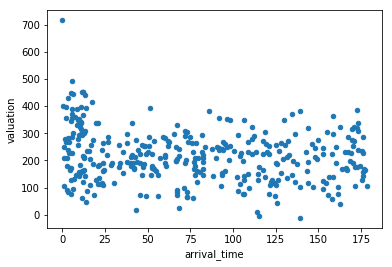

In [68]:
np.random.seed(0)
generateCustomers().plot(x='arrival_time',y='valuation',kind='scatter')

In [23]:
import pandas as pd
data=[[170,50],[150,40],[13,95],[12,100]]
customers=pd.DataFrame(data,columns=['arrival_time','valuation'])
print('Constant policy with 2 seats p=50 \t:',simulateConstant(customers,2,50))
print('Constant policy with 2 seats p=100 \t:',simulateConstant(customers,2,100))
print('Dynamic policy with 3 seats p1=40, p2=95 \t:',simulateDynamic(customers,3,40,95))
print('Dynamic policy with 2 seats p1=40, p2=95 \t:',simulateDynamic(customers,2,40,95))
print('Dynamic policy with 1 seats p1=50, p2=100 \t:',simulateDynamic(customers,1,50,100))
print('Rationing policy with 3 seats p1=40, p2=100, l=1 \t:',\
        simulateRationing(customers,3,40,100,1))
print('Rationing policy with 2 seats p1=40, p2=100, l=1 \t:',\
        simulateRationing(customers,2,40,100,1))
print('Rationing policy with 1 seats p1=40, p2=95, l=1 \t:',\
simulateRationing(customers,1,40,95,1))

Constant policy with 2 seats p=50 	: 100
Constant policy with 2 seats p=100 	: 100
Dynamic policy with 3 seats p1=40, p2=95 	: 175
Dynamic policy with 2 seats p1=40, p2=95 	: 80
Dynamic policy with 1 seats p1=50, p2=100 	: 50
Rationing policy with 3 seats p1=40, p2=100, l=1 	: 180
Rationing policy with 2 seats p1=40, p2=100, l=1 	: 140
Rationing policy with 1 seats p1=40, p2=95, l=1 	: 95
